In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [79]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Placement.csv')

In [80]:
df.head()

,Student_ID,CGPA,IQ,Placement
0,1,6.8,123,1
1,2,5.9,106,0
2,3,5.3,121,0
3,4,7.4,132,1
4,5,5.8,142,0


In [81]:
df.drop('Student_ID',1,inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [82]:
df.head()

,CGPA,IQ,Placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


In [83]:
#steps

#preprocess+EDA+Feature Selection
#Extract input an output
#scale the data
# train test split
# train the model
# model evaluation
# model deployement



In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CGPA       100 non-null    float64
 1   IQ         100 non-null    int64  
 2   Placement  100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


In [85]:
df.shape

(100, 3)

In [86]:
df.describe()

,CGPA,IQ,Placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


In [87]:
df.dtypes

CGPA         float64
IQ             int64
Placement      int64
dtype: object

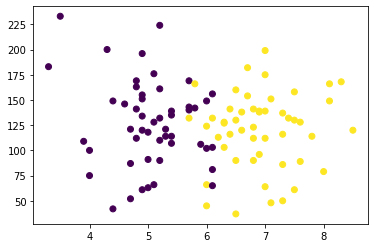

In [88]:
plt.scatter(df['CGPA'],df["IQ"],c = df['Placement'])

In [89]:
X = df.drop('Placement',1)
y = df['Placement']



from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [90]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

x_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [91]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

In [92]:
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [93]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)



0.48

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


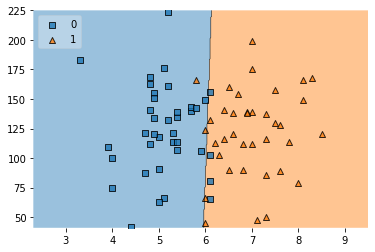

In [96]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train.values,y_train.values,clf = model ,legend = 2)
plt.show()